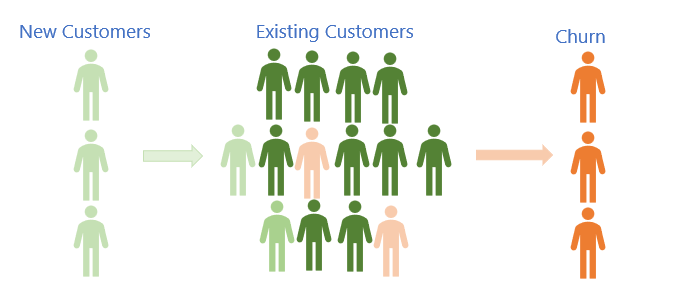

In [2]:
from IPython.display import display, Image

image_path = 'abcd.png'
display(Image(filename=image_path))

# Libraries : 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

| Column Name       | Description                              |
|-------------------|------------------------------------------|
| RowNumber         | Row number in the dataset                |
| CustomerId        | Unique identifier for each customer     |
| Surname           | Customer's last name                     |
| CreditScore       | Customer's credit score                  |
| Geography         | Customer's geographical location         |
| Gender            | Customer's gender                        |
| Age               | Customer's age                           |
| Tenure            | Number of years the customer has been with the company |
| Balance           | Customer's account balance               |
| NumOfProducts     | Number of products the customer has with the company |
| HasCrCard         | Whether the customer has a credit card  |
| IsActiveMember    | Whether the customer is an active member |
| EstimatedSalary   | Estimated salary of the customer        |
| Exited            | Target variable (1 if customer churned, 0 if not) |


In [2]:
data = pd.read_csv('Churn_Modelling.csv')
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


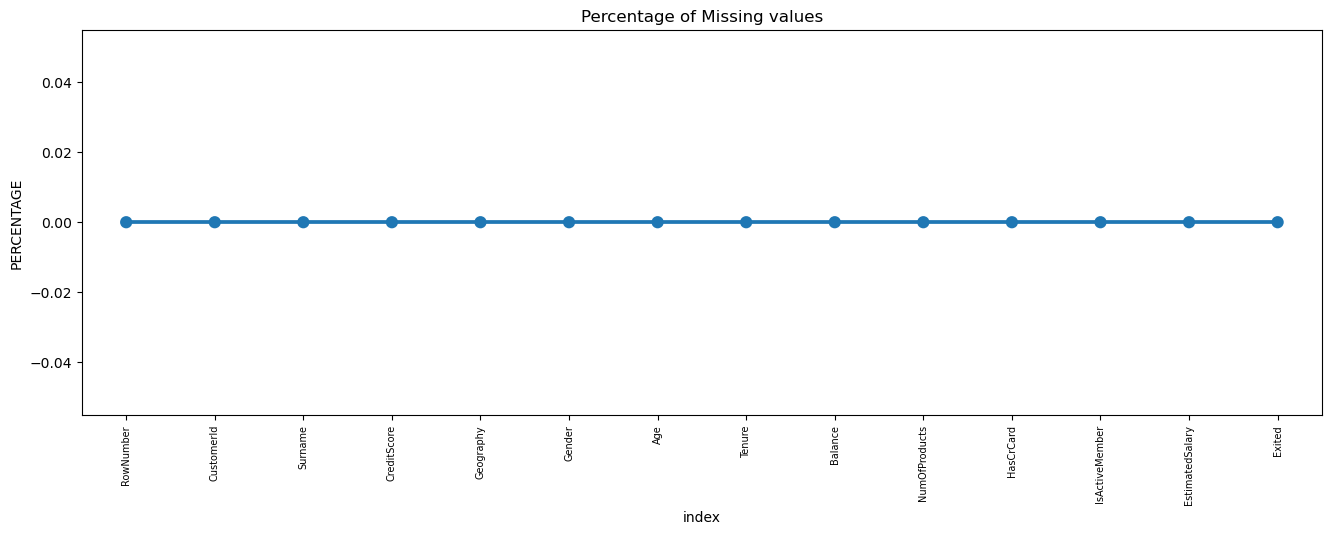

In [4]:
missing = pd.DataFrame((data.isnull().sum())*100/data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x = 'index',y = 0,data = missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [5]:
#dropping unncessary columns
data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Geography'])

In [6]:
data.shape

(10000, 10)

In [7]:
data.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,Male,27,2,134603.88,1,1,1,71725.73,0


# Univariate Analysis

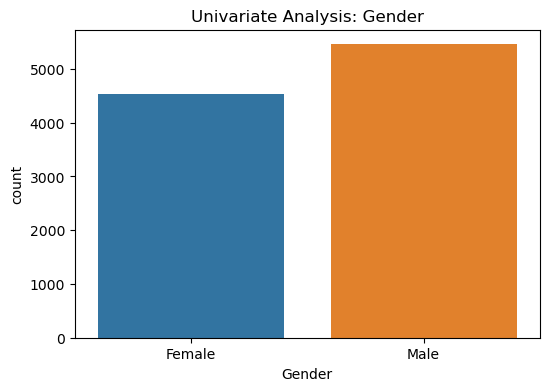

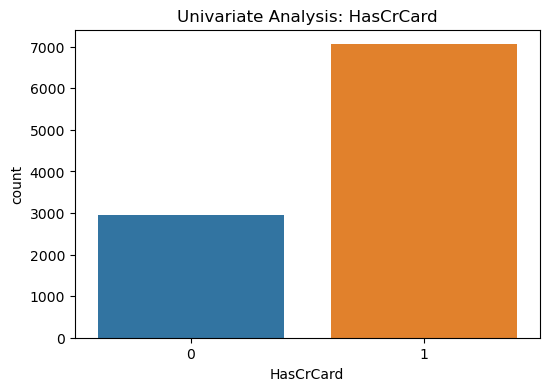

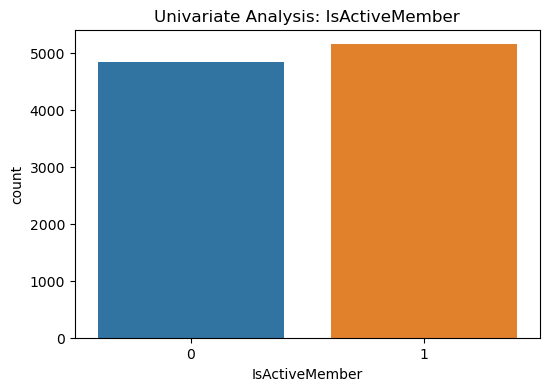

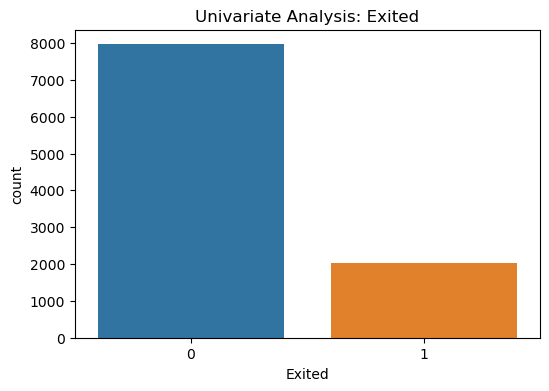

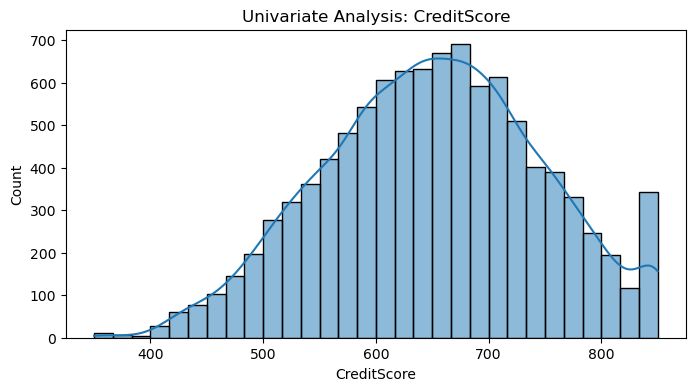

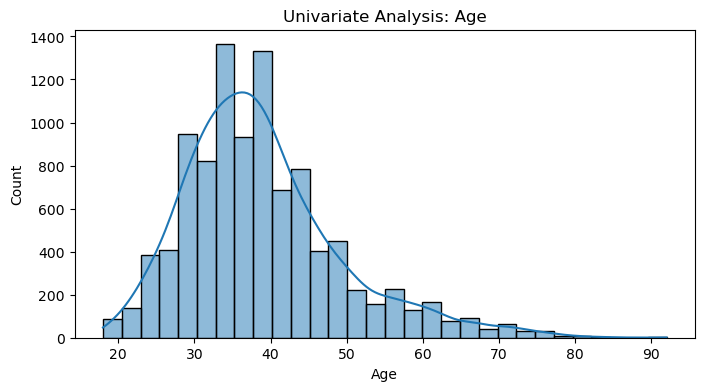

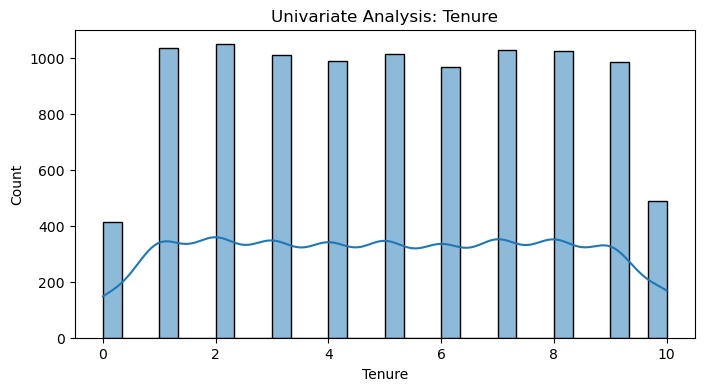

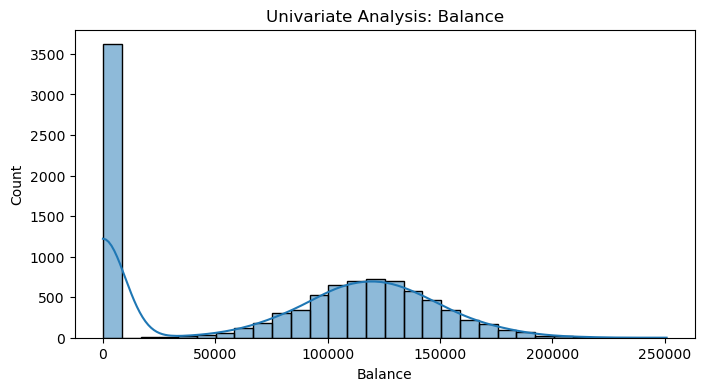

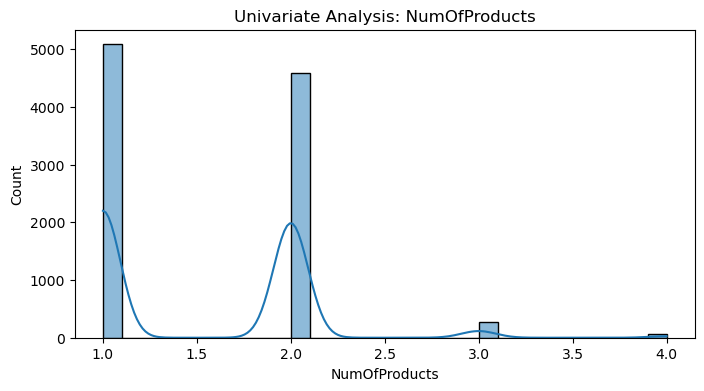

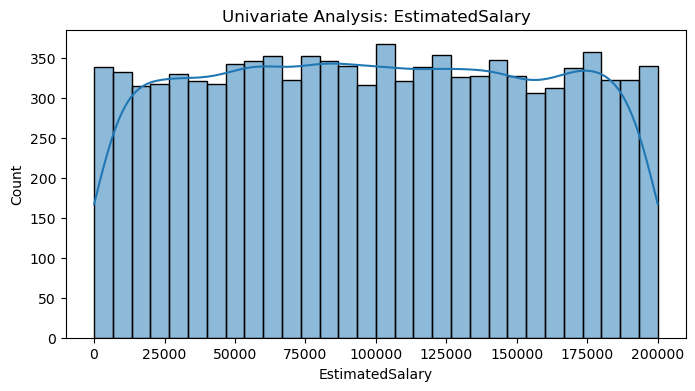

In [8]:
categorical_columns = ['Gender', 'HasCrCard', 'IsActiveMember', 'Exited']

for column in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=data, x=column)
    plt.title(f'Univariate Analysis: {column}')
    plt.show()
    
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=data, x=column, bins=30, kde=True)
    plt.title(f'Univariate Analysis: {column}')
    plt.show()

# Bivariate Analysis

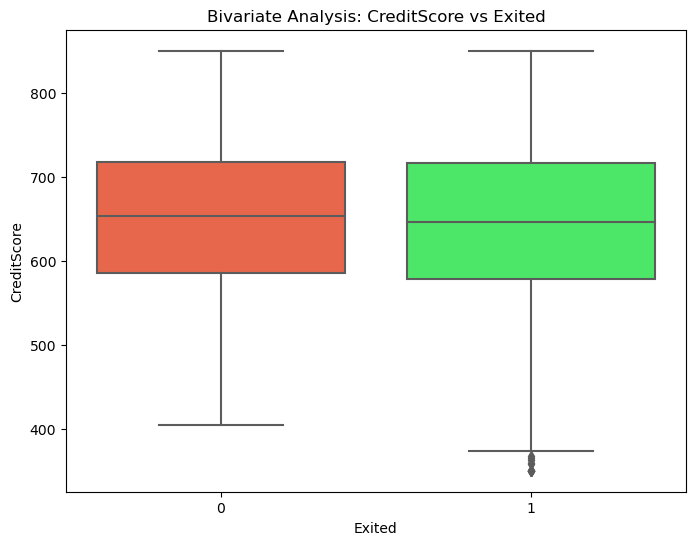

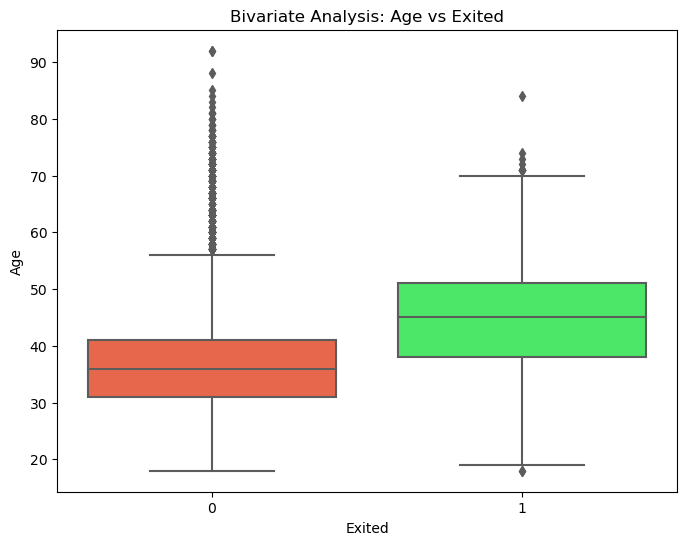

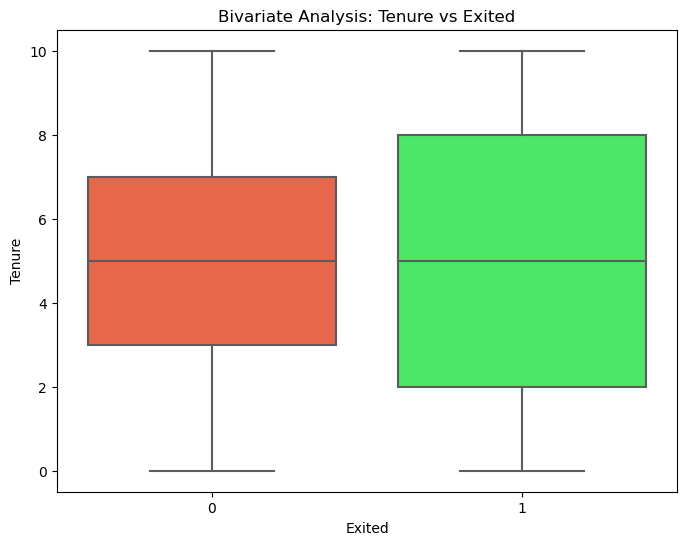

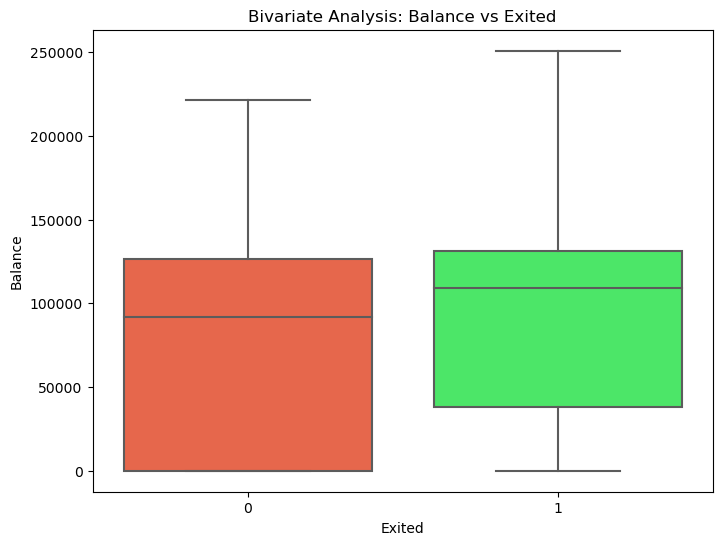

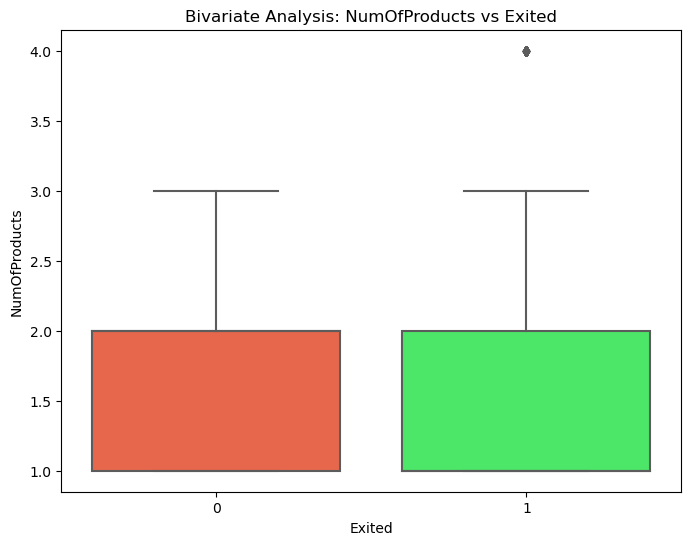

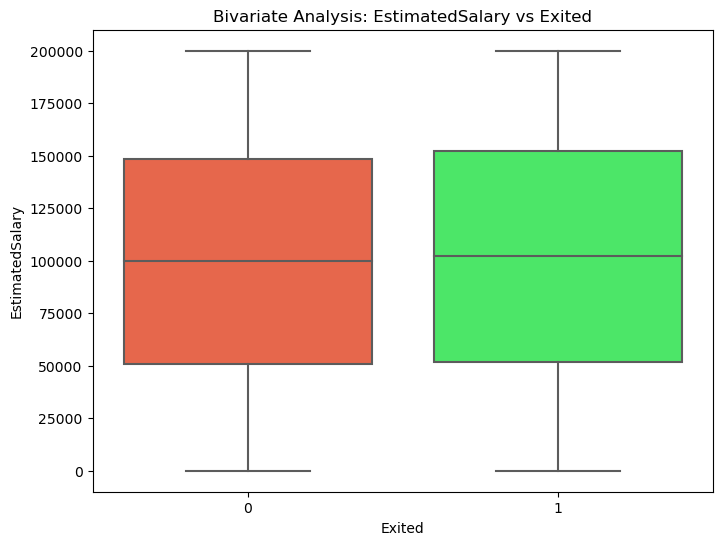

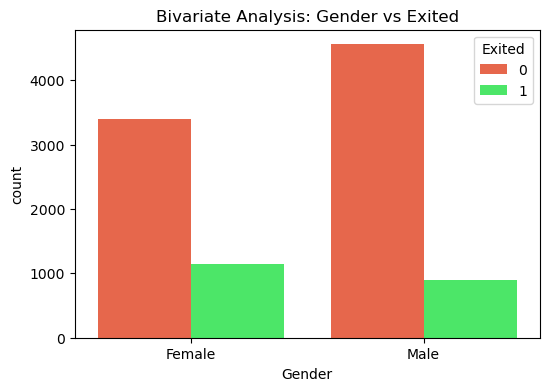

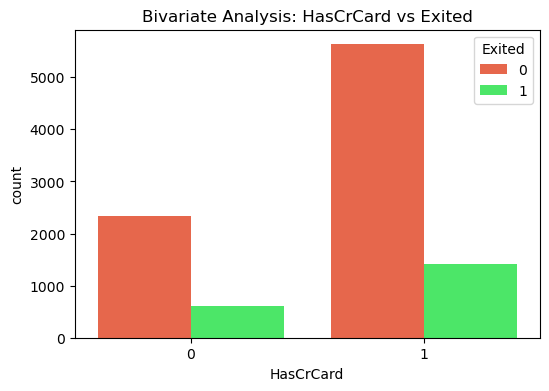

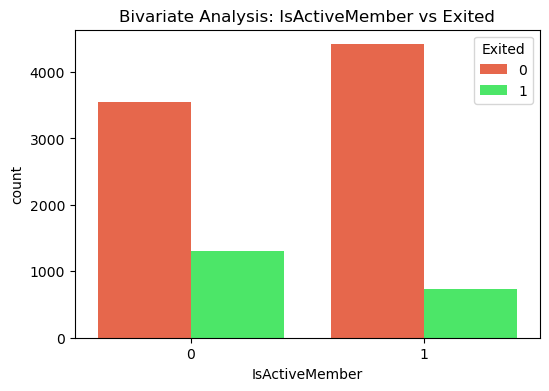

In [9]:
custom_palette = ['#FF5733', '#33FF57']
for column in numerical_columns:
    if column != 'Exited':
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=data, x='Exited', y=column, palette = custom_palette)
        plt.title(f'Bivariate Analysis: {column} vs Exited')
        plt.show()
for column in categorical_columns:
    if column != 'Exited':
        plt.figure(figsize=(6, 4))
        sns.countplot(data=data, x=column, hue='Exited', palette = custom_palette)
        plt.title(f'Bivariate Analysis: {column} vs Exited')
        plt.show()

In [10]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0


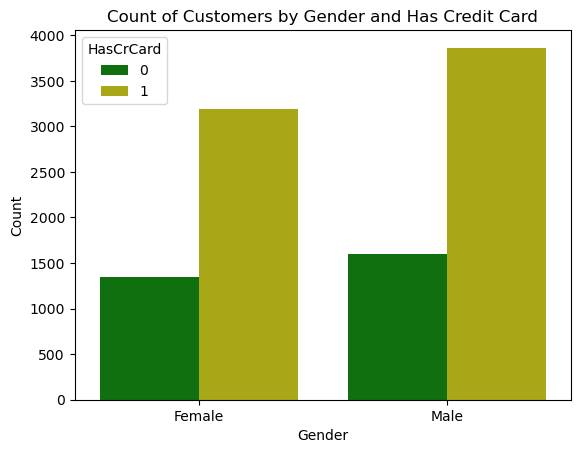

In [11]:
palette = ['g', 'y']
sns.countplot(x = 'Gender', hue = 'HasCrCard', data = data, palette = palette)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Customers by Gender and Has Credit Card')
plt.show()

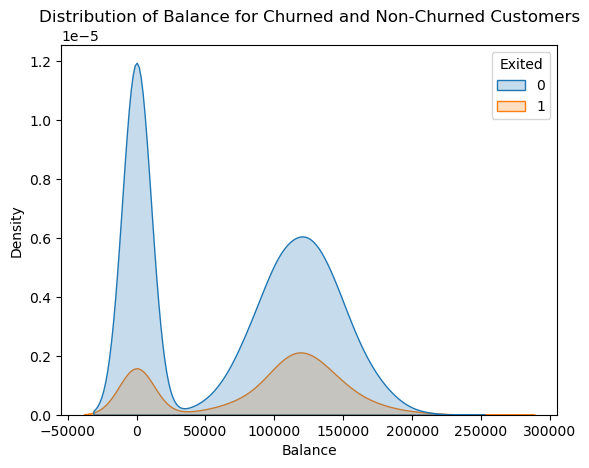

In [13]:
sns.kdeplot(data=data, x='Balance', hue='Exited', fill=True)
plt.xlabel('Balance')
plt.ylabel('Density')
plt.title('Distribution of Balance for Churned and Non-Churned Customers')
plt.show()

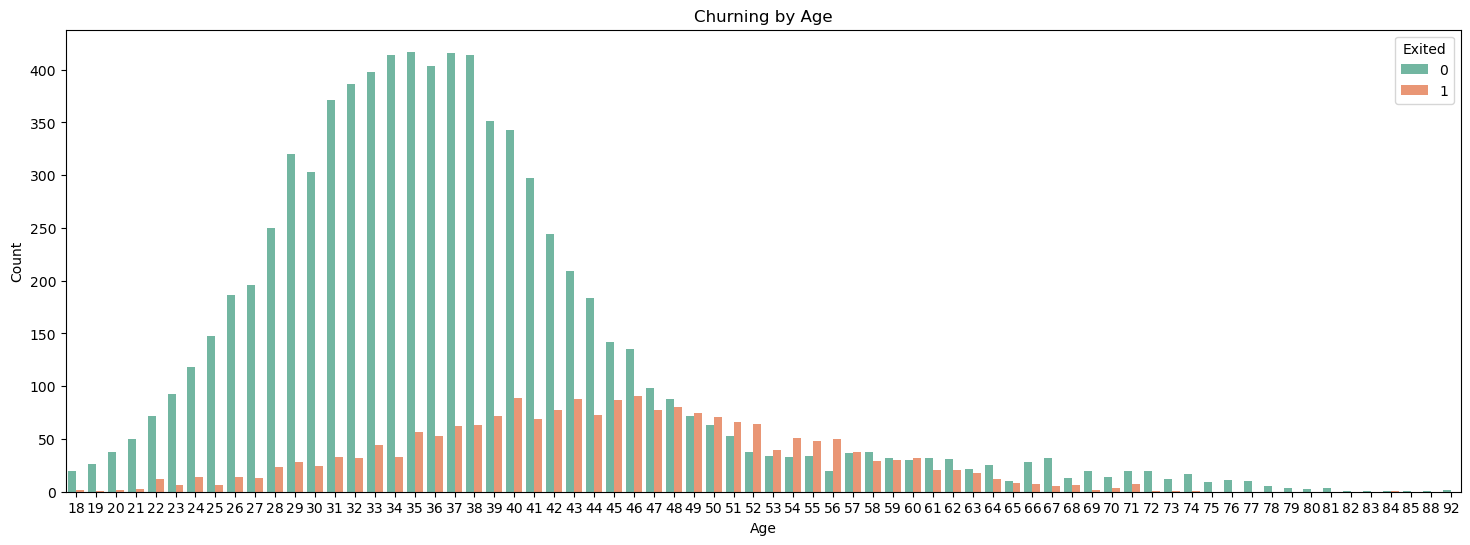

In [14]:
plt.figure(figsize=(18, 6))
sns.countplot(data=data, x='Age', hue='Exited', palette='Set2')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Churning by Age')

# Show the plot
plt.show()

Churn happens when balance is low

# Creating Dummies for Categorical Column

In [15]:
gender_dummies = pd.get_dummies(data['Gender'], prefix='Gender', drop_first=True)

gender_dummies.rename(columns={'Gender_Male': 'gender'}, inplace=True)

data = pd.concat([data, gender_dummies], axis=1)
data.drop('Gender', axis=1, inplace=True)

# Multivariate Analysis

<Axes: >

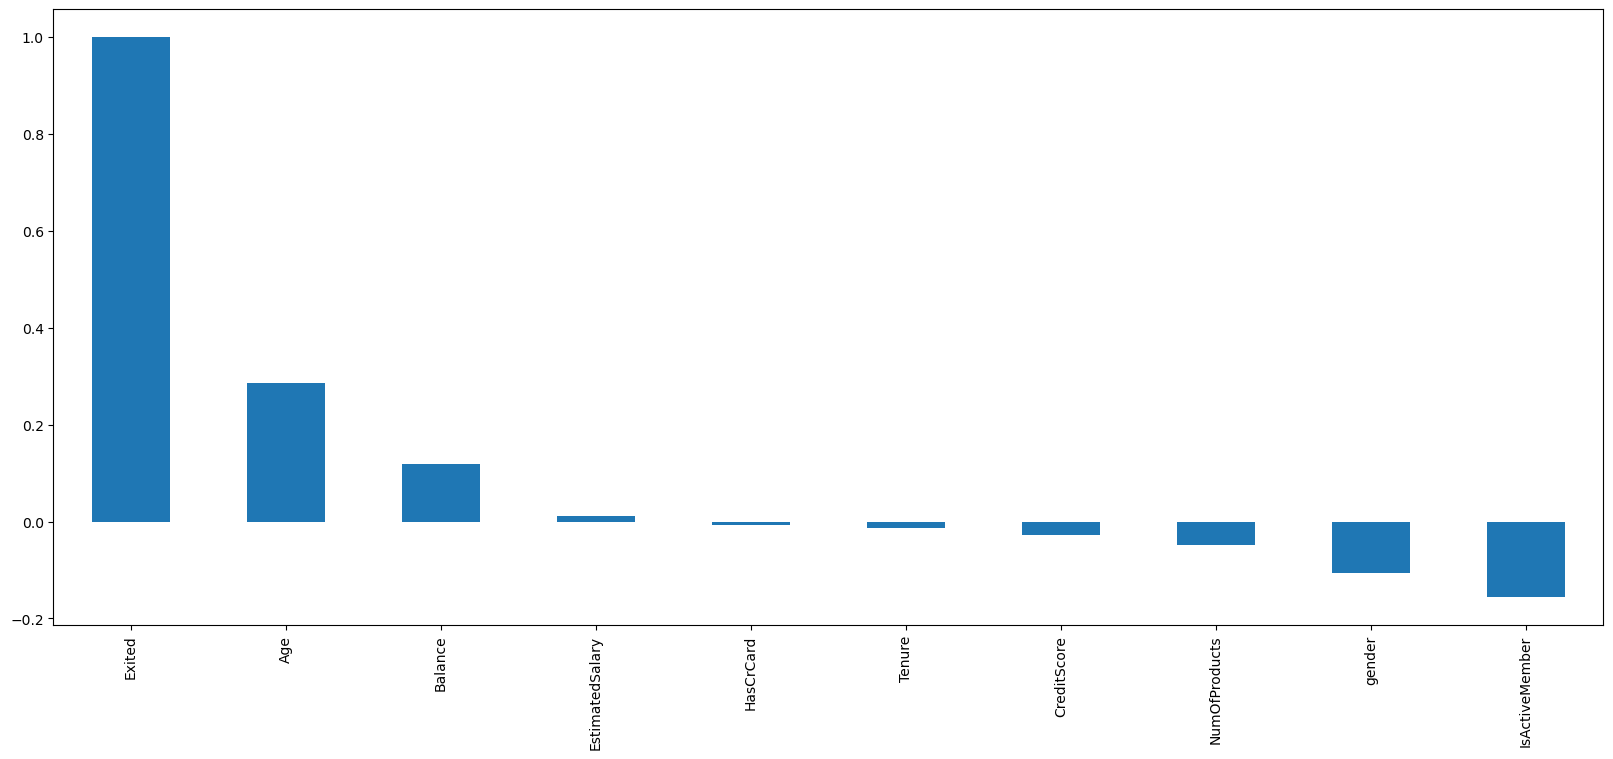

In [16]:
plt.figure(figsize=(20,8))
data.corr()['Exited'].sort_values(ascending = False).plot(kind='bar')

# Data Preparation: Splitting Features and Target Variable

In [18]:
X = data.drop(['Exited'], axis = 1)
y = data['Exited']

# Feature Selection

**top 5 features**

In [19]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier(n_estimators=100, random_state=42)

rfe = RFE(estimator, n_features_to_select=5)
rfe.fit(X, y)
selected_features = X.columns[rfe.support_]

In [20]:
selected_features

Index(['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary'], dtype='object')

In [21]:
X = data[selected_features]
y = data['Exited']

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.8016666666666666
Confusion Matrix:
 [[2357   59]
 [ 536   48]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.98      0.89      2416
           1       0.45      0.08      0.14       584

    accuracy                           0.80      3000
   macro avg       0.63      0.53      0.51      3000
weighted avg       0.74      0.80      0.74      3000



In [23]:
X.columns

Index(['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary'], dtype='object')

# Standard Scaling

In [24]:
from sklearn.preprocessing import StandardScaler
columns_to_scale = ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = StandardScaler()

data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

In [25]:
data['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

**imbalance data**

# Under Sampling

In [26]:
not_churned = data[data['Exited'] == 0]
churned = data[data['Exited'] == 1]

In [ ]:
print("Shape of not_churned: ", not_churned.shape)
print("Shape of churned: ", churned.shape)

In [28]:
not_churned_sample = not_churned.sample(n = 2037)
not_churned_sample.shape

(2037, 10)

In [29]:
new_data = pd.concat([not_churned_sample,churned],ignore_index=True)
new_data['Exited'].value_counts()

Exited
0    2037
1    2037
Name: count, dtype: int64

**balanced data**

# Splitting the new scaled and balanced data

In [33]:
X = new_data[['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary']]
y = new_data['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Model Development and Evaluation

In [34]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVC' : SVC(),
    'Decision Tree' : DecisionTreeClassifier(),
    'KNN' : KNeighborsClassifier(),
    'GaussianNB' : GaussianNB(),
    'AdaBoost' : AdaBoostClassifier()}

for model_name, model in models.items():
    print(f"Running {model_name}...")
    
    #Fit
    model.fit(X_train, y_train)
    
    #Predict
    y_pred = model.predict(X_test)
    
    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    print(f"Results for {model_name}:")
    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", class_report)
    print("\n")

Running Logistic Regression...
Results for Logistic Regression:
Accuracy: 0.6950920245398773
Confusion Matrix:
 [[596 244]
 [253 537]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.71      0.71       840
           1       0.69      0.68      0.68       790

    accuracy                           0.70      1630
   macro avg       0.69      0.69      0.69      1630
weighted avg       0.70      0.70      0.70      1630



Running Random Forest...
Results for Random Forest:
Accuracy: 0.7288343558282209
Confusion Matrix:
 [[629 211]
 [231 559]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.75      0.74       840
           1       0.73      0.71      0.72       790

    accuracy                           0.73      1630
   macro avg       0.73      0.73      0.73      1630
weighted avg       0.73      0.73      0.73      1630



Running Gradient Boosting...
Results

# Saving all the Models

In [77]:
import joblib
model_filenames = {}

for model_name, model in models.items():
    model_filename = f"{model_name}_model.pkl"
    joblib.dump(model, model_filename)
    
    #Storing
    model_filenames[model_name] = model_filename

    print(f"{model_name} model saved as {model_filename}")

Logistic Regression model saved as Logistic Regression_model.pkl
Random Forest model saved as Random Forest_model.pkl
Gradient Boosting model saved as Gradient Boosting_model.pkl
SVC model saved as SVC_model.pkl
Decision Tree model saved as Decision Tree_model.pkl
KNN model saved as KNN_model.pkl
GaussianNB model saved as GaussianNB_model.pkl
AdaBoost model saved as AdaBoost_model.pkl


Let's utilize the below test data, which consists of scaled values from our CSV file, and evaluate which models provide predictions most closely aligned with the expected outcomes: 0 0 0 0 1 1 1 1

# Predicting Churn Using Trained Models on Test Data

In [79]:
test_data = [[-0.440036, 0.198164, 0.117350, -0.911583, 0.216534],
            [1.774174, 1.056346, -1.225848, 0.807737, -1.565487],
            [-1.547141, 0.484225, 1.050820, 0.807737, -0.437329],
            [2.063884, 0.388871, 0.785728, -0.911583, -0.365276],
            [-0.326221, 0.293517, -1.225848, -0.911583, 0.021886],
            [-0.057205, 0.484225, 0.597329, 0.807737, 0.863650],
            [0.025569, 1.819175, 0.899393, -0.911583, -1.651826],
            [-1.816157, 0.579578, 0.926017, -0.911583, -1.25665]]

models = {
    'Logistic Regression': 'Logistic Regression_model.pkl',
    'Random Forest': 'Random Forest_model.pkl',
    'Gradient Boosting': 'Gradient Boosting_model.pkl',
    'SVC': 'SVC_model.pkl',
    'Decision Tree': 'Decision Tree_model.pkl',
    'KNN': 'KNN_model.pkl',
    'GaussianNB': 'GaussianNB_model.pkl',
    'AdaBoost': 'AdaBoost_model.pkl'
}

model_predictions = {}

for model_name, model_filename in models.items():
    loaded_model = joblib.load(model_filename)
    
    #Predicting
    predictions = loaded_model.predict(test_data)
    model_predictions[model_name] = predictions

#Displaying Prediction
for model_name, predictions in model_predictions.items():
    print(f"{model_name} Predictions:", predictions)

Logistic Regression Predictions: [1 1 1 1 0 1 1 1]
Random Forest Predictions: [0 0 1 0 1 1 1 1]
Gradient Boosting Predictions: [1 1 0 1 1 1 1 1]
SVC Predictions: [1 0 1 1 1 0 1 1]
Decision Tree Predictions: [0 1 1 0 1 1 1 1]
KNN Predictions: [0 0 1 0 0 0 1 1]
GaussianNB Predictions: [1 1 1 1 0 1 1 1]
AdaBoost Predictions: [1 1 0 1 1 0 1 1]


# It appears that the Random Forest model generated predictions that closely align with the actual outcomes. Therefore, we will employ this model for our upcoming predictions

- It is possible for different machine learning models to perform differently on various evaluation metrics. 
- While SVC and Gradient Boosting may excel in terms of accuracy and precision-recall, Random Forest can still outperform them when it comes to making specific predictions, especially when the predicted values closely align with the expected ones. 
- This demonstrates the importance of considering multiple evaluation metrics and the specific context of the problem when choosing the best model for a particular task.